**1. BUSINESS UNDERSTANDING**
# Tujuan: Memprediksi diagnosis Alzheimer berdasarkan fitur medis pasien menggunakan machine learning.

**2. DATA UNDERSTANDING**


*Import LIBRARY*

In [122]:
# === Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    roc_curve, auc
)
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(context='notebook', palette='muted', style='darkgrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

*LOAD DATA*

In [123]:
df = pd.read_csv("alzheimer_db.csv")
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [124]:
print(df.shape)

(2149, 35)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


**3. DATA PREPARATION & CLEANING DATA**

In [127]:
# Mengecek missing value,dan uplicate data
print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Duplicate Data ===")
print(df.duplicated().sum())


=== Missing Values ===
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompl

In [128]:
# Menghapus variabel atau fitur tidak penting
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


**4. Data Visualization**

In [130]:
# Memisahkan kolom dengan tipe data numerik dan kategorikal

kolom_numerik = [col for col in df.columns if df[col].nunique() > 10]

kolom_kategorikal = df.columns.difference(kolom_numerik).difference(['Diagnosis']).to_list()

*DATA TRANSFORMATIONS*

In [131]:
# Mengubah label dari kolom kategorikal

ubah_label = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

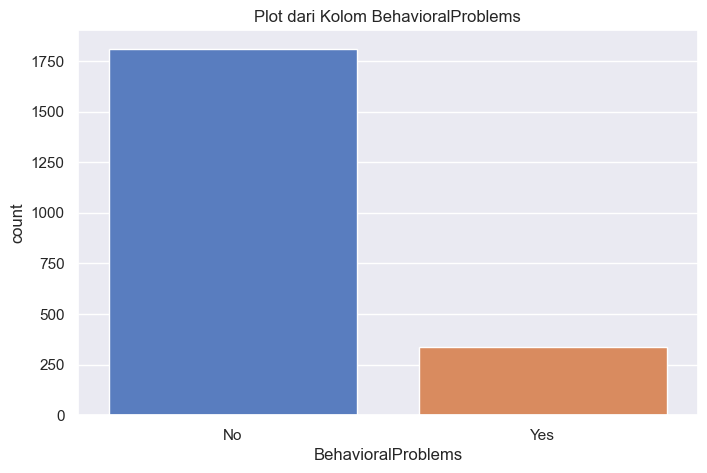

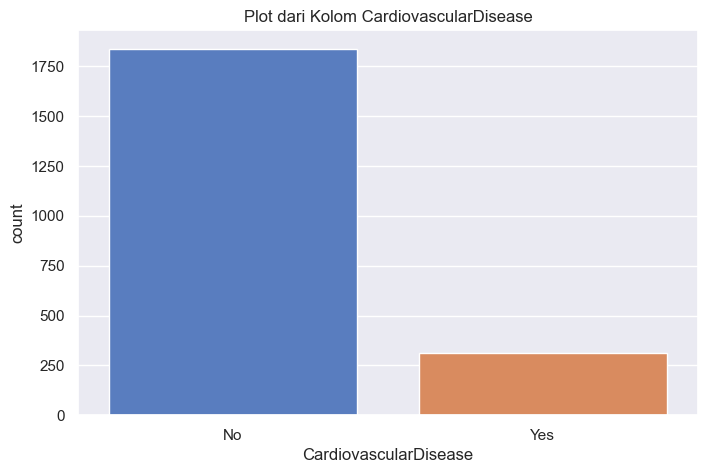

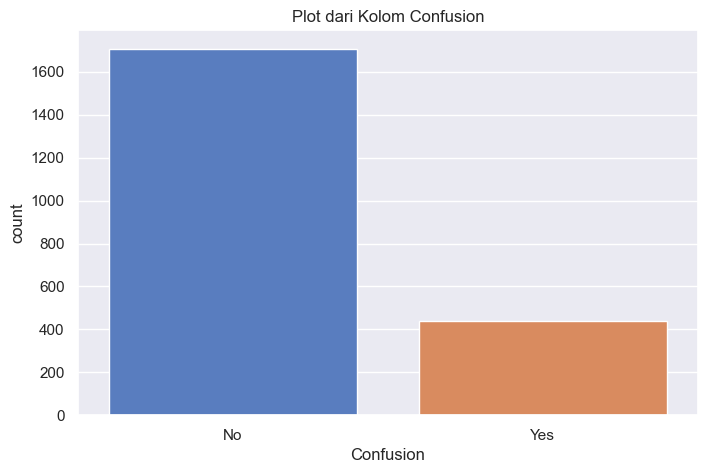

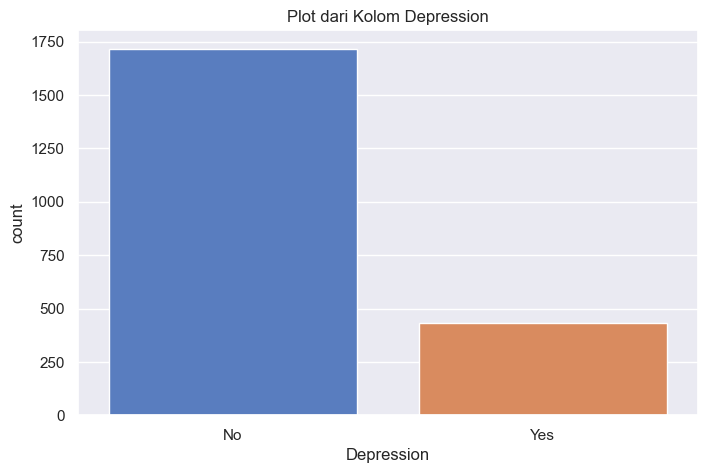

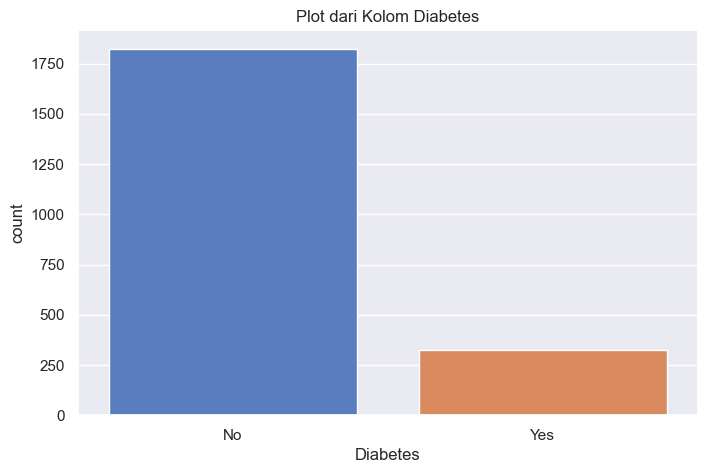

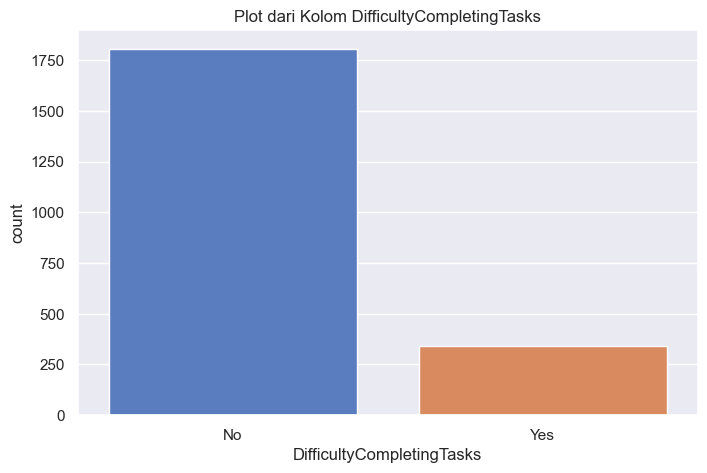

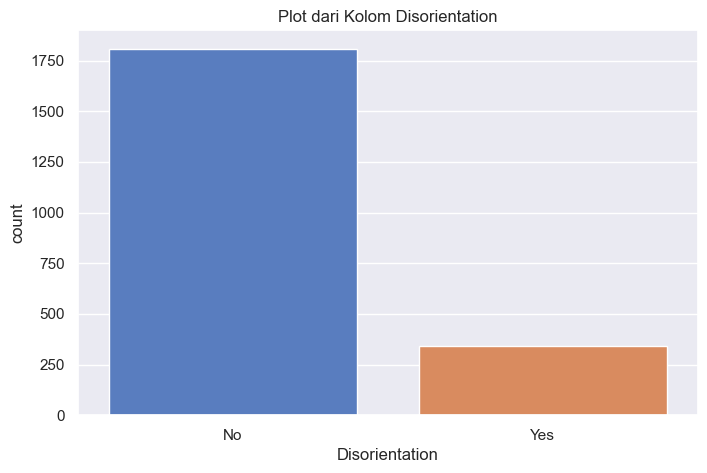

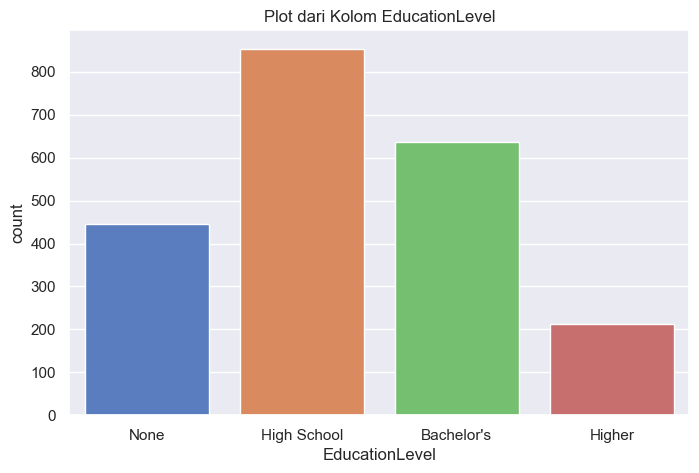

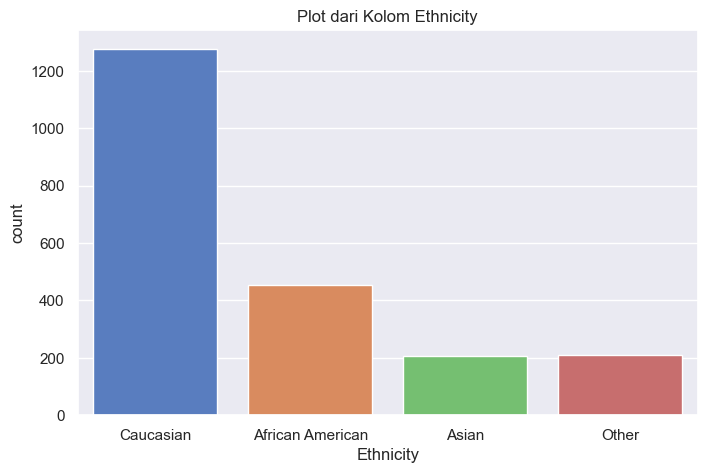

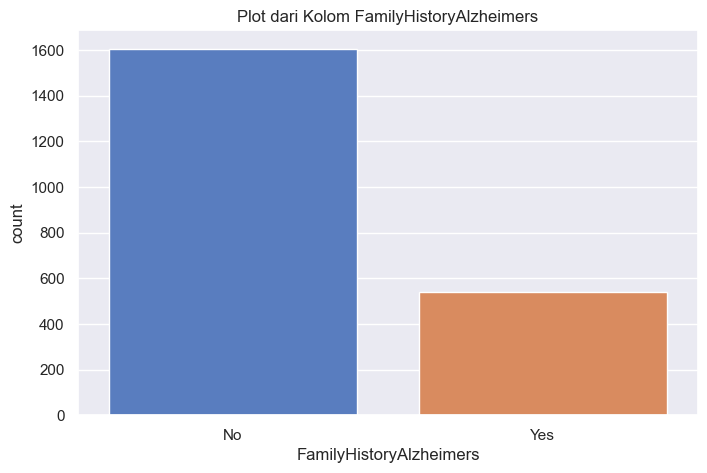

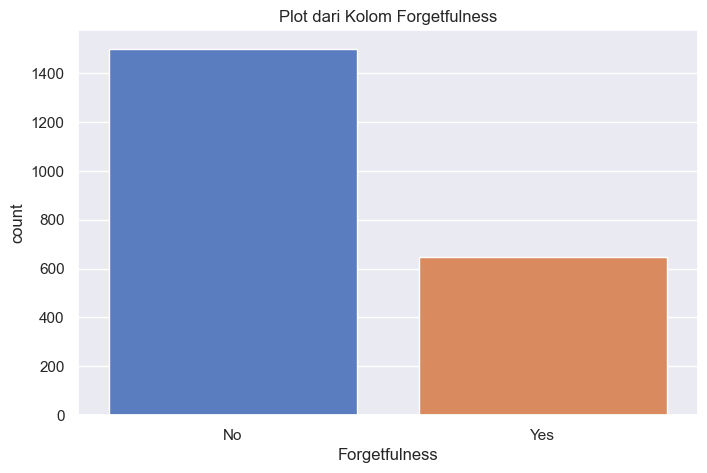

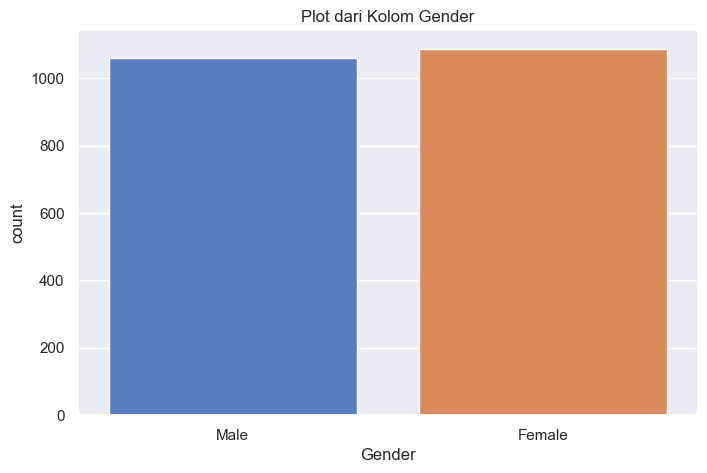

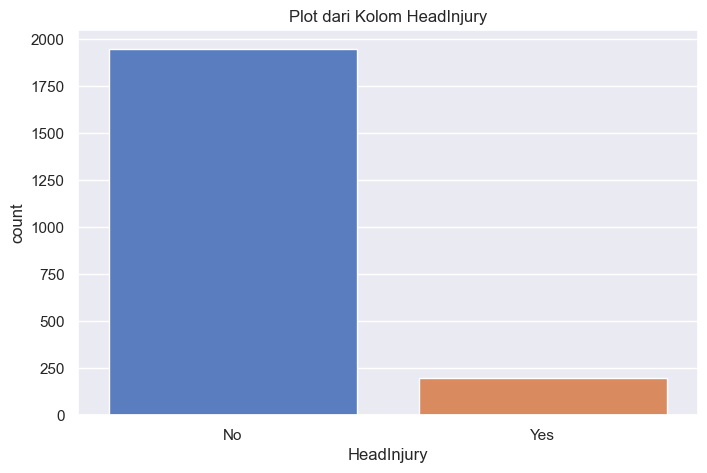

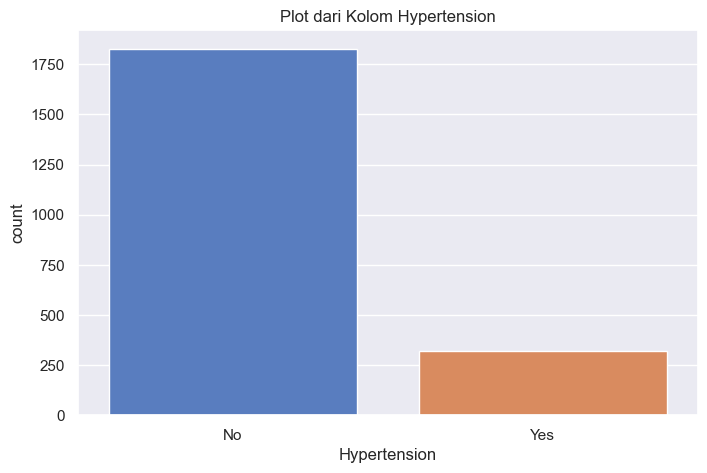

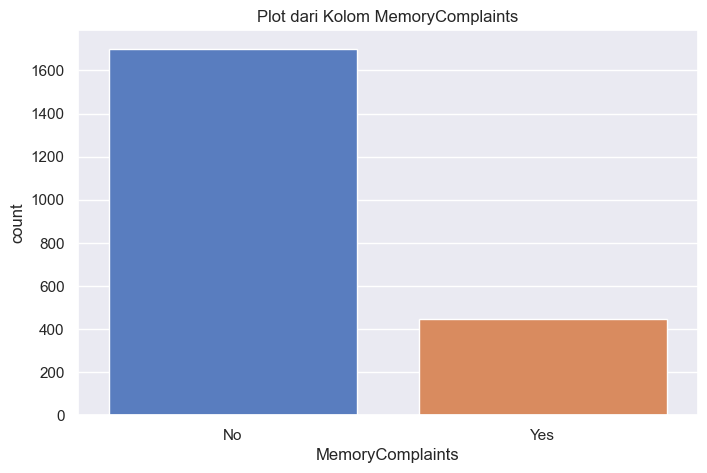

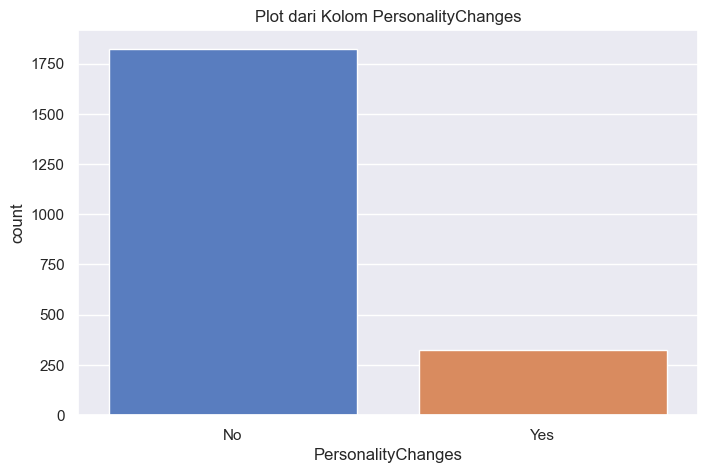

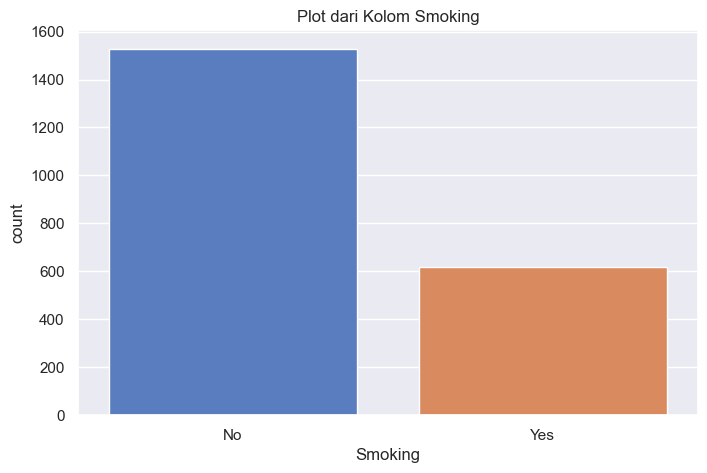

In [132]:
# Plot untuk masing-masing kolom kategorikal

for column in kolom_kategorikal:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='muted')
    plt.title(f'Plot dari Kolom {column}')
    
    # berdasarkan custom labels
    labels = ubah_label[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

- Secara keseluruhan, kumpulan data tersebut sebagian besar terdiri dari individu tanpa penyakit atau masalah kesehatan.
- Kaukasia (Caucasian). Kelompok demografi yang paling banyak 
- Lulusan sekolah menengah atas (High school ) merupakan kelompok pendidikan terbesar, diikuti oleh individu dengan gelar sarjana (bachelor's ).
- Khususnya, baik perempuan (females) maupun laki-laki (males) terrepresentasi secara merata di seluruh kumpulan data.

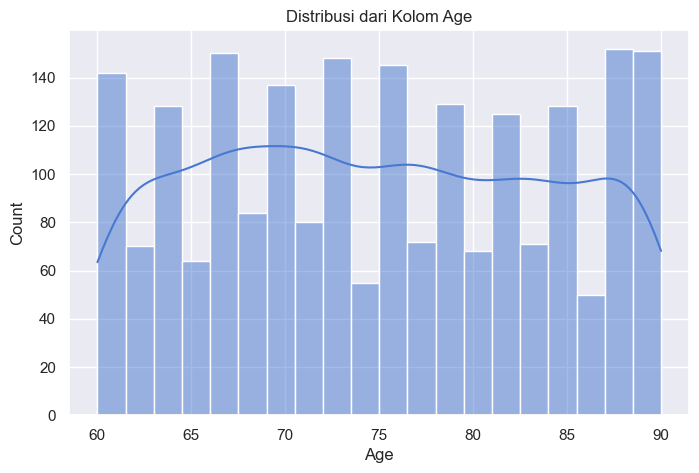

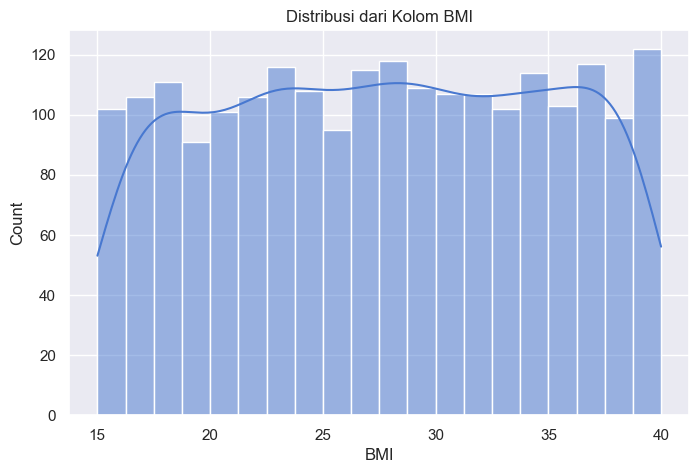

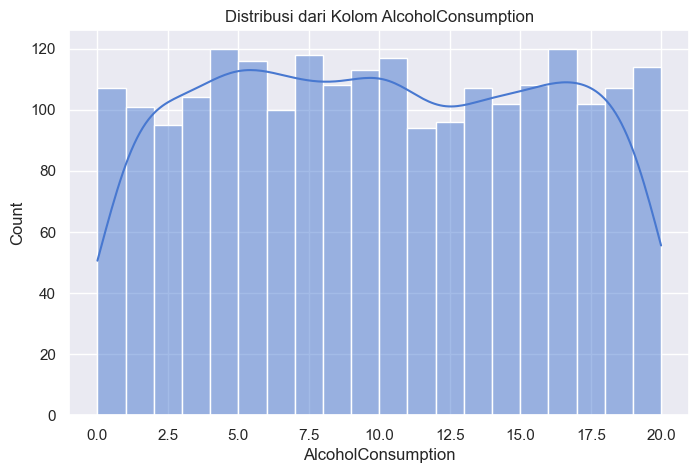

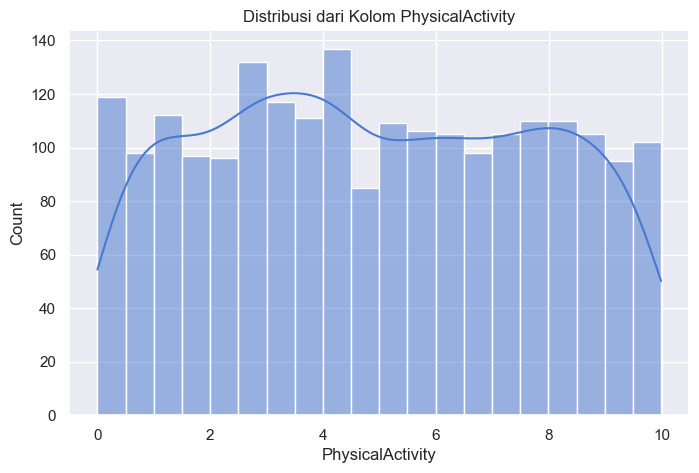

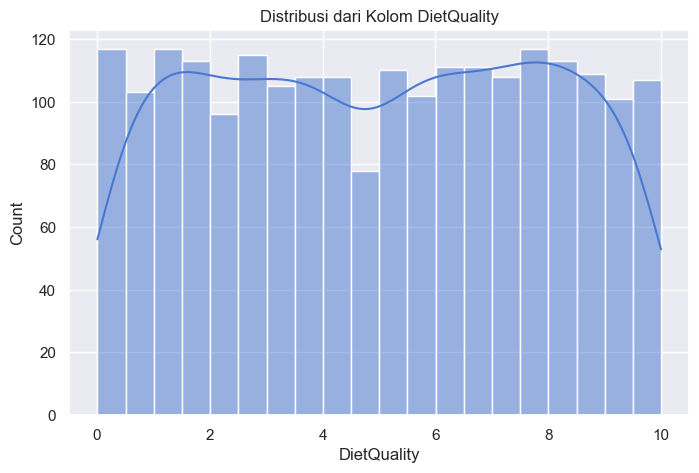

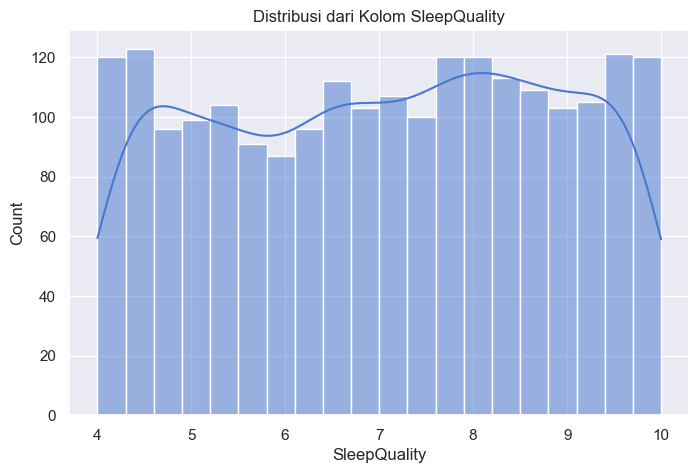

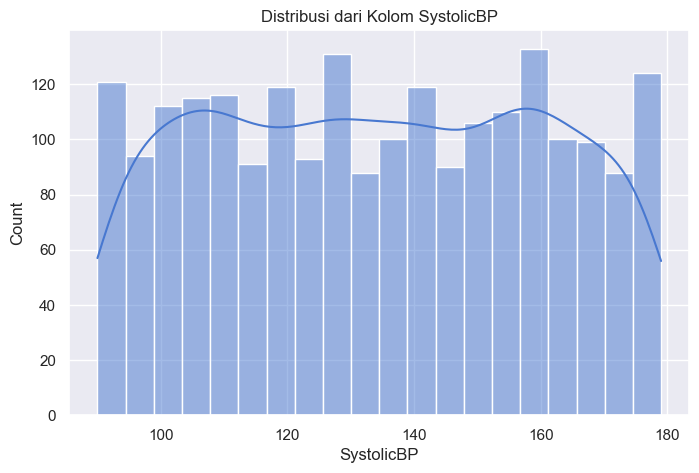

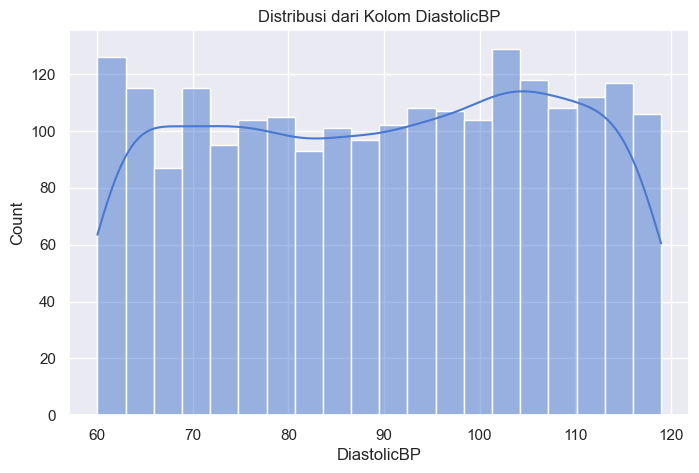

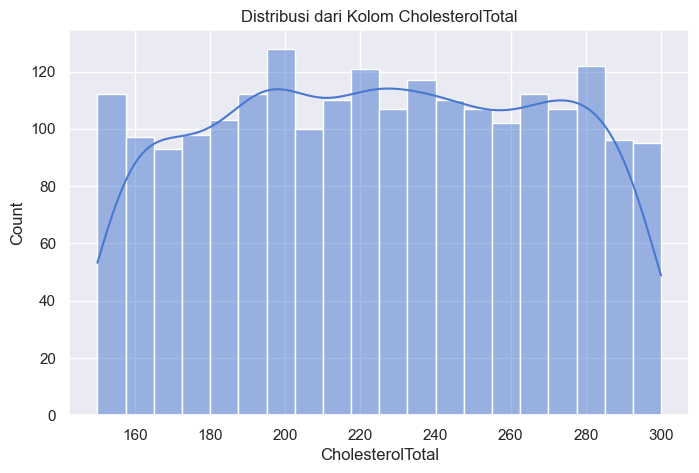

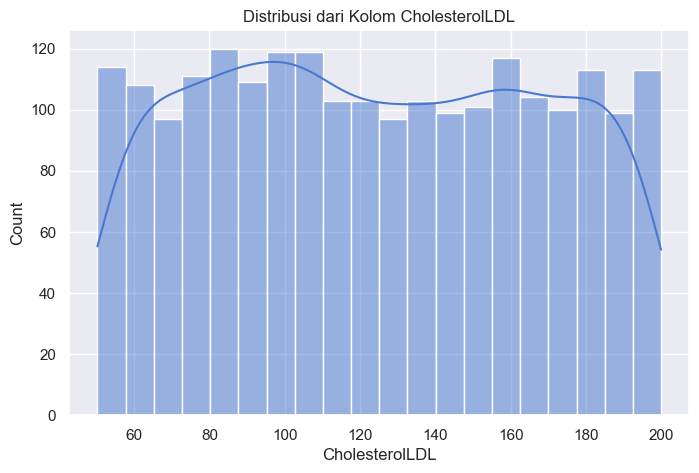

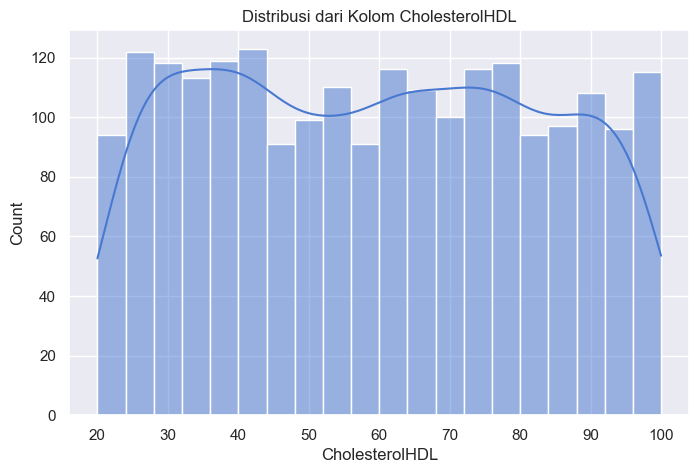

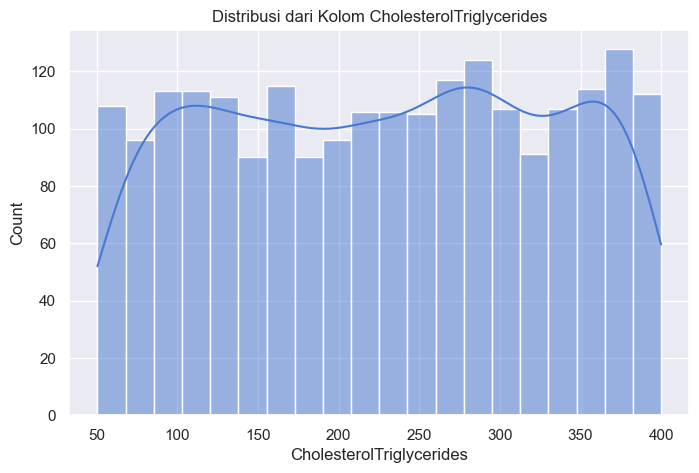

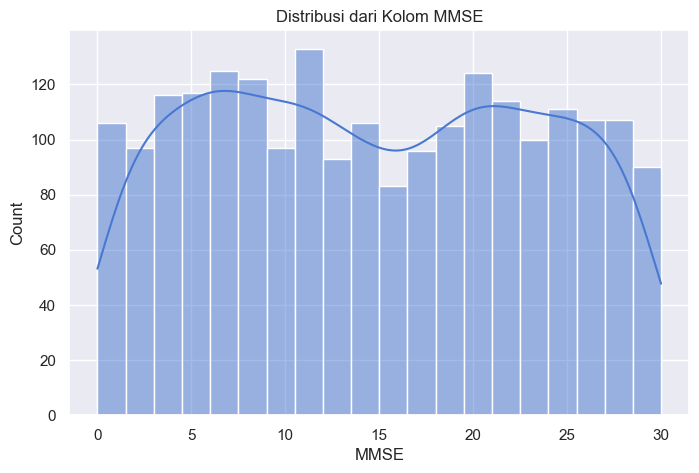

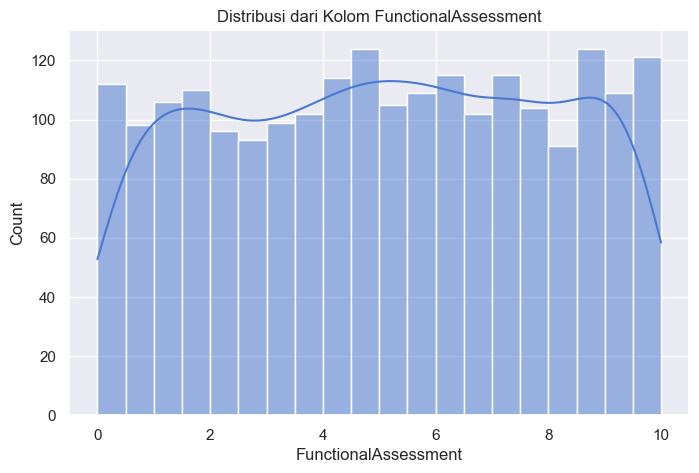

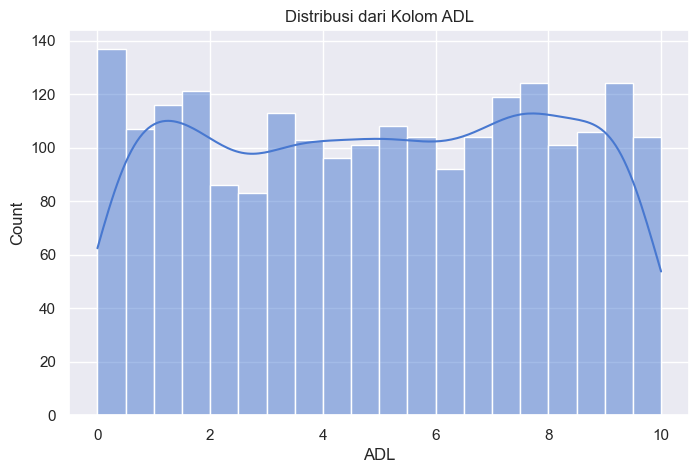

In [133]:
# Plot untuk Masing-masing kolom numrikal

for column in kolom_numerik:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20, palette='muted')
    plt.title(f'Distribusi dari Kolom {column}')
    plt.show()

- Sebagian besar kolom menunjukkan distribusi yang cukup seragam.
- Skor `MMSE` (Mini-Mental State Examination) tampaknya mengikuti distribusi bimodal, yang menunjukkan dua kelompok berbeda dalam data.

*EKSPLORASI KORELASI SETIAP KOLOM*

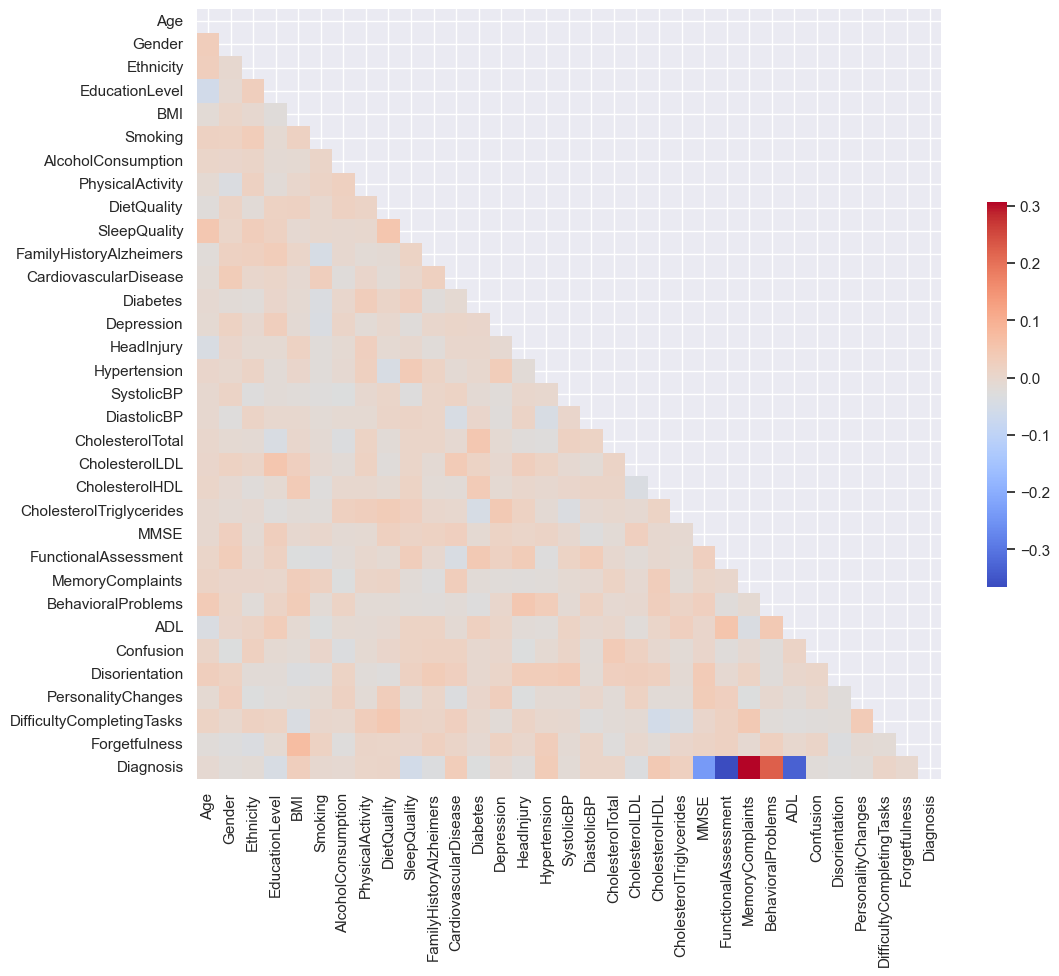

In [134]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap metrik korelasi setiap kolom
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

- Heatmap menunjukkan bahwa fitur-fitur tersebut tidak memiliki korelasi yang kuat di antara mereka sendiri. Namun, ada lima kolom yang menunjukkan korelasi dengan variabel target (Diagnosis) yaitu MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, dan ADL.

- Selanjutnya dilakukan hitung koefisien korelasi Pearson (r Pearson). 
- korelasi Pearson (r Pearson) adalah ukuran hubungan linier antara dua variabel untuk mengukur tingkat hubungan linier sepasang variabel, mulai dari -1 hingga 1.

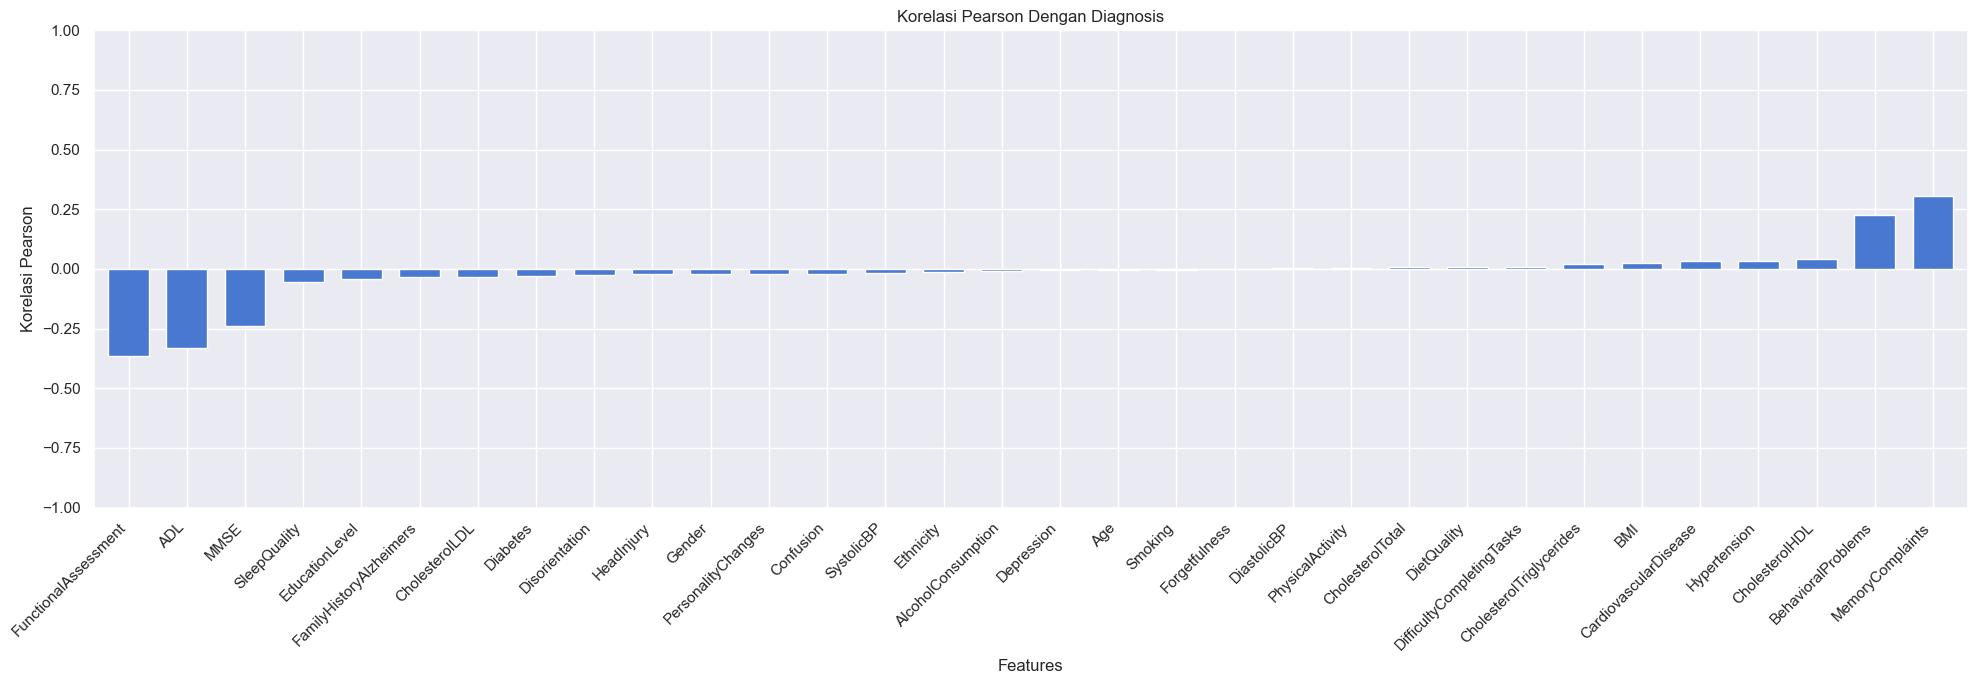

In [135]:
korelasi = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

plt.figure(figsize=(20, 7))

ax = korelasi.plot(kind='bar', width=0.7)

ax.set(ylim=[-1, 1], ylabel='Korelasi Pearson', xlabel='Features', title='Korelasi Pearson Dengan Diagnosis')


ax.set_xticklabels(korelasi.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Berdasarkan Korelasi Pearson diatas dapat diketahui bahwa MemoryComplaints memiliki nilai korelasi tertinggi dengan target (Diagnosis)

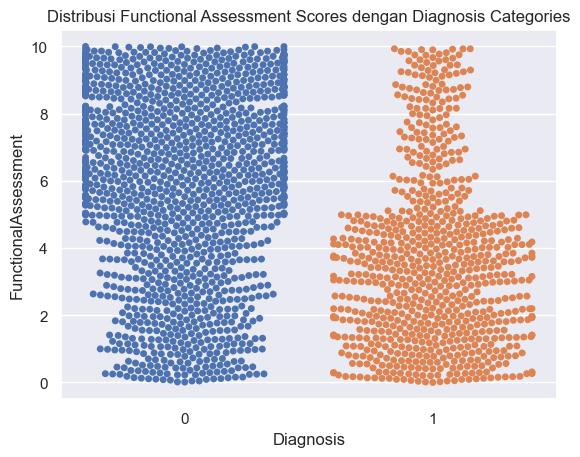

In [136]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis', palette='deep')        
plt.title(f'Distribusi Functional Assessment Scores dengan Diagnosis Categories')
plt.show()

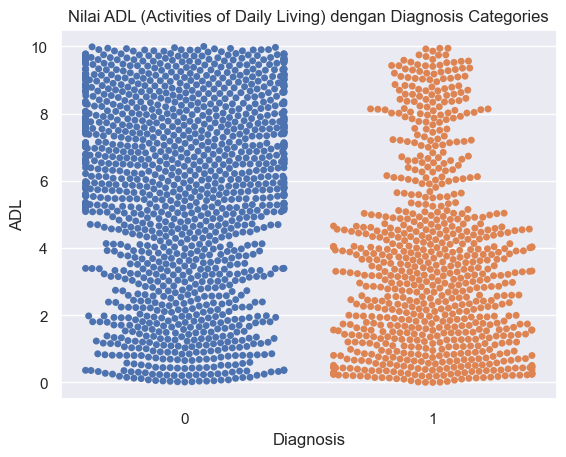

In [137]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis', palette='deep')        
plt.title(f'Nilai ADL (Activities of Daily Living) dengan Diagnosis Categories')
plt.show()

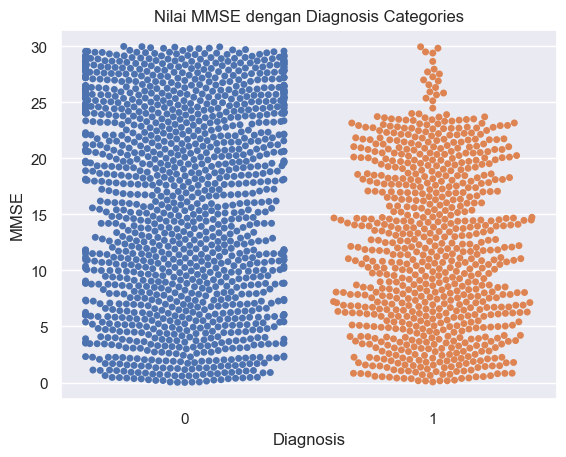

In [138]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis', palette='deep')        
plt.title(f'Nilai MMSE dengan Diagnosis Categories')
plt.show()

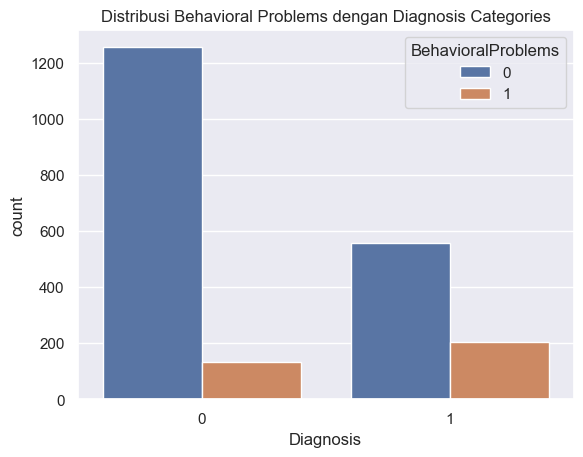

In [139]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems', palette='deep')
plt.title(f'Distribusi Behavioral Problems dengan Diagnosis Categories')
plt.show()

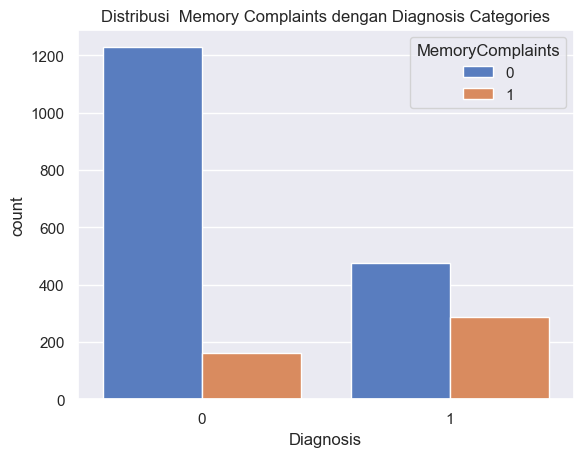

In [140]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribusi  Memory Complaints dengan Diagnosis Categories')
plt.show()

- Seperti yang diamati, ada lima kolom yang berkorelasi dengan variabel target (diagnosis).
- Tiga fitur numerik—`Functional Assessment`, `ADL` (Aktivitas Kehidupan Sehari-hari), dan `MMSE` (Pemeriksaan Status Mental Mini)—berkorelasi negatif dengan `diagnosis penyakit Alzheimer`, dengan koefisien korelasi masing-masing -0,36, -0,33, dan -0,24. Hal ini menunjukkan bahwa skor yang lebih rendah dalam penilaian ini dikaitkan dengan kemungkinan diagnosis Alzheimer yang lebih tinggi.
- Selain itu, dua variabel kategoris—`Behavioral Problems` dan `Memory Complaints`—berkorelasi positif dengan `diagnosis`, dengan koefisien korelasi masing-masing 0,22 dan 0,30. Ini berarti adanya masalah ini dikaitkan dengan kemungkinan diagnosis Alzheimer yang lebih tinggi, yang menyoroti signifikansinya dalam proses diagnostik.

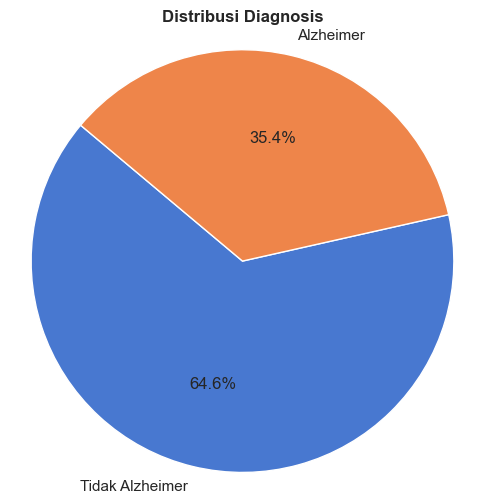

In [141]:
# Distribusi diagnosis
labels = ['Tidak Alzheimer', 'Alzheimer']
counts = df['Diagnosis'].value_counts().sort_index().tolist()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Diagnosis', fontweight='bold')
plt.axis('equal')  # Agar bulat
plt.show()

- Berdasarkan pie chart diatas menunjukkan bahwa variabel/fitur target (diagnosis) tidak seimbang/Imbalanced, dengan 65% bernilai 0 (Tidak Alzheimer) dan 35% bernilai 1 (Alzheimer).

**5. DATA PREPROCESSING/PREPARATION**

In [142]:
df.head(20)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0
6,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0
7,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1
8,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0
9,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0


In [143]:
#unique values pada setiap column
for column in df.columns:
    print(f"Unique values pada Kolom '{column}':")
    print(df[column].unique())
    print()

Unique values pada Kolom 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values pada Kolom 'Gender':
[0 1]

Unique values pada Kolom 'Ethnicity':
[0 3 1 2]

Unique values pada Kolom 'EducationLevel':
[2 0 1 3]

Unique values pada Kolom 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values pada Kolom 'Smoking':
[0 1]

Unique values pada Kolom 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values pada Kolom 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values pada Kolom 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values pada Kolom 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values pada Kolom 'FamilyHistoryAlzheimers':
[0 1]

Unique values pada Kolom 'Cardiovascular

In [144]:
# Pisahkan fitur dan target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
        'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 
        'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']



In [145]:
#standarisasi
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])
df.head(15)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
5,1.233984,1,1,1,0.411764,0,-1.024794,-1.648555,-1.171861,0.119598,0,0,1,0,0,0,1.300344,-1.583307,1.305243,1.706750,0.847979,0.349756,1.482079,0.148713,0,0,1.367449,1,0,0,0,0,0
6,-0.768658,0,3,2,1.487290,1,-1.631769,1.518450,0.310912,-0.892371,0,0,0,0,1,0,0.336704,-0.105060,0.906055,-1.657544,0.305606,-0.115653,-1.485368,0.339573,0,0,1.442266,0,0,0,0,1,0
7,0.010147,0,0,1,-1.230597,0,0.640031,-0.094783,1.151420,-1.609535,0,0,0,0,0,0,-0.665481,-1.526451,-1.735489,-1.261920,0.773037,-0.173697,-0.535999,-0.580443,0,0,-0.157917,1,0,0,0,1,1
8,-0.323626,1,1,0,0.024598,0,0.369735,-1.186351,0.599559,-0.738932,0,0,0,0,0,1,-0.665481,1.657465,0.197690,0.454598,-0.708385,-0.756326,1.285032,0.800812,0,1,-1.433232,0,0,1,0,0,0
9,1.345242,0,0,0,1.081051,1,1.040419,0.532315,1.063438,0.283974,0,1,0,0,0,0,-0.164388,-0.673616,1.326815,0.142116,0.640955,-0.824863,1.583213,-1.359286,0,1,-0.145321,0,0,0,0,0,0


**MODELLING RANDOM FOREST & EVALUASI MODEL**


In [146]:
#Tanpa SMOTE
# Split data (90:10)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Melatih model tanpa SMOTE
model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Tampilkan hasil
print("=== Evaluasi Model Tanpa SMOTE ===")
print(f"Split Ratio (Train:Test) : {int((1-0.1)*100)}:{int(0.1*100)}")
print(f"Random State             : {42}")
print(f"n_estimators             : {200}")
print(f"max_depth                : {12}")
print(f"Accuracy                 : {accuracy:.4f}")
print(f"Precision                : {precision:.4f}")
print(f"Recall                   : {recall:.4f}")
print(f"F1 Score                 : {f1:.4f}")

=== Evaluasi Model Tanpa SMOTE ===
Split Ratio (Train:Test) : 90:10
Random State             : 42
n_estimators             : 200
max_depth                : 12
Accuracy                 : 0.9395
Precision                : 0.9400
Recall                   : 0.9243
F1 Score                 : 0.9314


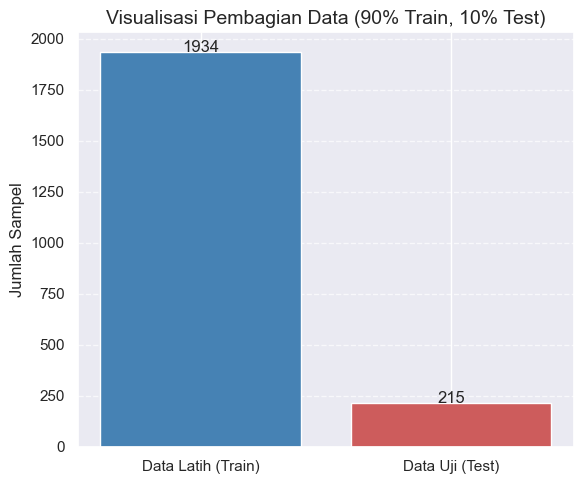

In [147]:
# Jumlah data
jumlah_data = [len(X_train), len(X_test)]
label = ['Data Latih (Train)', 'Data Uji (Test)']

# Plot batang
plt.figure(figsize=(6, 5))
bars = plt.bar(label, jumlah_data, color=['steelblue', 'indianred'])

# Tambahkan label nilai
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2, f'{height}', ha='center', fontsize=12)

plt.title('Visualisasi Pembagian Data (90% Train, 10% Test)', fontsize=14)
plt.ylabel('Jumlah Sampel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

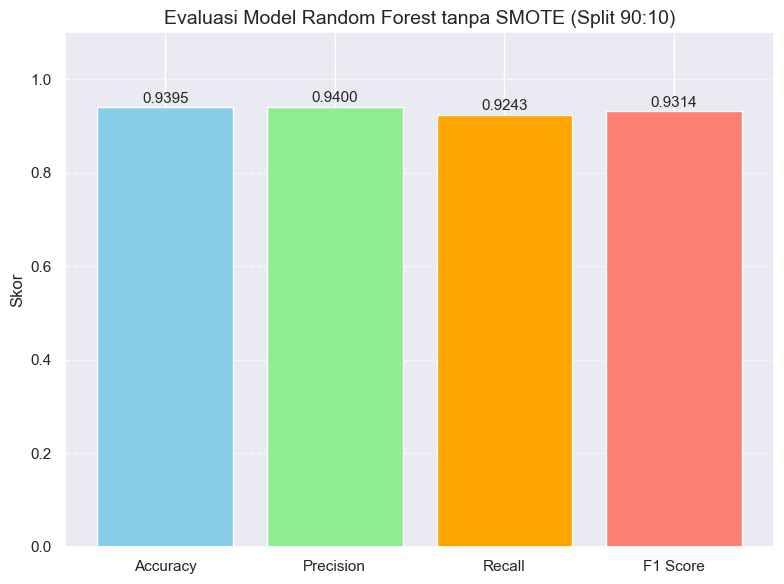

In [148]:
# Data hasil evaluasi
metrik = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nilai = [accuracy, precision, recall, f1]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrik, nilai, color=['skyblue', 'lightgreen', 'orange', 'salmon'])

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.4f}', ha='center', fontsize=11)

plt.ylim(0, 1.1)
plt.title('Evaluasi Model Random Forest tanpa SMOTE (Split 90:10)', fontsize=14)
plt.ylabel('Skor')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [149]:
# Skenario split data (90:10, 80:20, 70:30)

split_ratios = [0.1, 0.2, 0.3]
random_states = [20, 42, 60]
n_estimators_list = [200, 300, 500]
max_depth_list = [10, 12, 15]

hasil_tanpa_smote = []

for rs in random_states:
    for ratio in split_ratios:
        # Split data tanpa SMOTE
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratio, random_state=rs)

        for n_est in n_estimators_list:
            for depth in max_depth_list:
                model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=rs)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                hasil_tanpa_smote.append({
                    'Random State': rs,
                    'Split Ratio': ratio,
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
                    'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
                    'F1 Score': f1_score(y_test, y_pred, average='macro', zero_division=0)
                })

df_tanpa_smote = pd.DataFrame(hasil_tanpa_smote)

# Tampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.width', None)  # Tidak membungkus kolom
pd.set_option('display.max_colwidth', None)  # Tampilkan isi kolom sepenuhnya

print("=== Hasil Evaluasi Tanpa SMOTE ===")
display(df_tanpa_smote)

best_tanpa = df_tanpa_smote.loc[df_tanpa_smote['Accuracy'].idxmax()]
print("\n=== Parameter Terbaik Tanpa SMOTE ===")
print(f"Split Ratio (Train:Test): {best_tanpa['Split Ratio']}")
print(f"Random State            : {best_tanpa['Random State']}")
print(f"n_estimators            : {best_tanpa['n_estimators']}")
print(f"max_depth               : {best_tanpa['max_depth']}")
print(f"Accuracy                : {best_tanpa['Accuracy']:.4f}")
print(f"Precision               : {best_tanpa['Precision']:.4f}")
print(f"Recall                  : {best_tanpa['Recall']:.4f}")
print(f"F1 Score                : {best_tanpa['F1 Score']:.4f}")

=== Hasil Evaluasi Tanpa SMOTE ===


,Random State,Split Ratio,n_estimators,max_depth,Accuracy,Precision,Recall,F1 Score
0,20,0.1,200,10,0.920930,0.920844,0.897044,0.907471
1,20,0.1,200,12,0.934884,0.935637,0.914778,0.924113
2,20,0.1,200,15,0.925581,0.924514,0.904187,0.913271
3,20,0.1,300,10,0.930233,0.932070,0.907635,0.918356
4,20,0.1,300,12,0.930233,0.932070,0.907635,0.918356
5,20,0.1,300,15,0.930233,0.932070,0.907635,0.918356
6,20,0.1,500,10,0.920930,0.925005,0.893350,0.906686
7,20,0.1,500,12,0.930233,0.932070,0.907635,0.918356
8,20,0.1,500,15,0.930233,0.932070,0.907635,0.918356
9,20,0.2,200,10,0.934884,0.932623,0.920017,0.925862



=== Parameter Terbaik Tanpa SMOTE ===
Split Ratio (Train:Test): 0.1
Random State            : 42.0
n_estimators            : 200.0
max_depth               : 15.0
Accuracy                : 0.9488
Precision               : 0.9473
Recall                  : 0.9380
F1 Score                : 0.9424


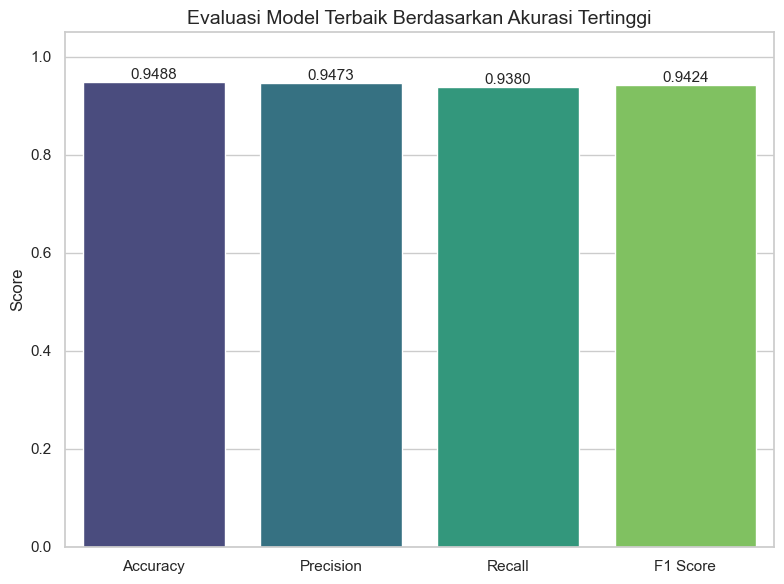

In [150]:
df_best = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [
        best_tanpa['Accuracy'],
        best_tanpa['Precision'],
        best_tanpa['Recall'],
        best_tanpa['F1 Score']
    ]
})
# Set gaya plot
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Metric', y='Score', data=df_best, palette='viridis')

# Tambahkan nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)

# Format sumbu dan judul
plt.ylim(0, 1.05)
plt.title('Evaluasi Model Terbaik Berdasarkan Akurasi Tertinggi', fontsize=14)
plt.ylabel('Score')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [151]:
from imblearn.over_sampling import SMOTE
# Skenario split data (90:10, 80:20, 70:30)
split_ratios = [0.1, 0.2, 0.3]
random_states = [20, 42, 60]
n_estimators_list = [200, 300, 500]
max_depth_list = [10, 12, 15]

hasil_dengan_smote = []

for rs in random_states:
    for ratio in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratio, random_state=rs, stratify=y)

        smote = SMOTE(random_state=rs)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        for n_est in n_estimators_list:
            for depth in max_depth_list:
                model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=rs)
                model.fit(X_train_smote, y_train_smote)
                y_pred = model.predict(X_test)

                hasil_dengan_smote.append({
                    'Random State': rs,
                    'Split Ratio': ratio,
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
                    'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
                    'F1 Score': f1_score(y_test, y_pred, average='macro', zero_division=0)
                })

df_dengan_smote = pd.DataFrame(hasil_dengan_smote)

# Tampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.width', None)  # Tidak membungkus kolom
pd.set_option('display.max_colwidth', None)  # Tampilkan isi kolom sepenuhnya

print("=== Hasil Evaluasi dengan SMOTE ===")
display(df_dengan_smote)

best_dengan = df_dengan_smote.loc[df_dengan_smote['Accuracy'].idxmax()]
print("\n=== Parameter Terbaik dengan SMOTE ===")
print(f"Split Ratio (Train:Test): {best_dengan['Split Ratio']}")
print(f"Random State            : {best_dengan['Random State']}")
print(f"n_estimators            : {best_dengan['n_estimators']}")
print(f"max_depth               : {best_dengan['max_depth']}")
print(f"Accuracy                : {best_dengan['Accuracy']:.4f}")
print(f"Precision               : {best_dengan['Precision']:.4f}")
print(f"Recall                  : {best_dengan['Recall']:.4f}")
print(f"F1 Score                : {best_dengan['F1 Score']:.4f}")


=== Hasil Evaluasi dengan SMOTE ===


,Random State,Split Ratio,n_estimators,max_depth,Accuracy,Precision,Recall,F1 Score
0,20,0.1,200,10,0.888372,0.886755,0.865960,0.874709
1,20,0.1,200,12,0.906977,0.905172,0.889294,0.896296
2,20,0.1,200,15,0.902326,0.898523,0.885697,0.891469
3,20,0.1,300,10,0.902326,0.898523,0.885697,0.891469
4,20,0.1,300,12,0.902326,0.901330,0.882715,0.890744
5,20,0.1,300,15,0.897674,0.894581,0.879118,0.885925
6,20,0.1,500,10,0.897674,0.894581,0.879118,0.885925
7,20,0.1,500,12,0.897674,0.897509,0.876136,0.885150
8,20,0.1,500,15,0.902326,0.901330,0.882715,0.890744
9,20,0.2,200,10,0.923256,0.927997,0.903375,0.913713



=== Parameter Terbaik dengan SMOTE ===
Split Ratio (Train:Test): 0.1
Random State            : 42.0
n_estimators            : 200.0
max_depth               : 12.0
Accuracy                : 0.9535
Precision               : 0.9469
Recall                  : 0.9521
F1 Score                : 0.9494


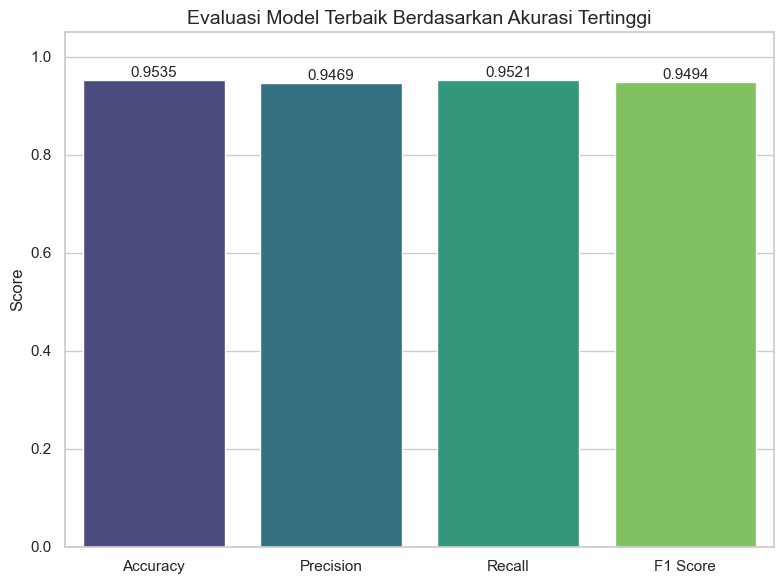

In [152]:
df_best = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [
        best_dengan['Accuracy'],
        best_dengan['Precision'],
        best_dengan['Recall'],
        best_dengan['F1 Score']
    ]
})
# Set gaya plot
sns.set(style="whitegrid")

# Buat barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Metric', y='Score', data=df_best, palette='viridis')

# Tambahkan nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)

# Format sumbu dan judul
plt.ylim(0, 1.05)
plt.title('Evaluasi Model Terbaik Berdasarkan Akurasi Tertinggi', fontsize=14)
plt.ylabel('Score')
plt.xlabel('')

plt.tight_layout()
plt.show()

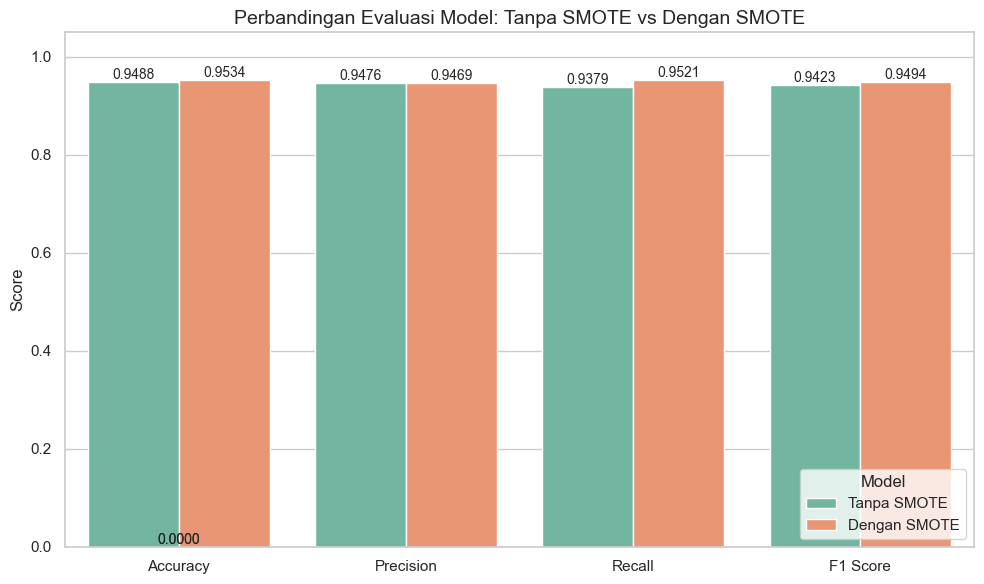

In [153]:
scores_tanpa = {
    'Accuracy': 0.9488,
    'Precision': 0.9476,
    'Recall': 0.9379,
    'F1 Score': 0.9423
}

scores_smote = {
    'Accuracy': 0.9534,
    'Precision': 0.9469,
    'Recall': 0.9521,
    'F1 Score': 0.9494
}

# Gabungkan dalam DataFrame
df_perbandingan = pd.DataFrame({
    'Metric': list(scores_tanpa.keys()) * 2,
    'Score': list(scores_tanpa.values()) + list(scores_smote.values()),
    'Model': ['Tanpa SMOTE'] * 4 + ['Dengan SMOTE'] * 4
})

# Visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Metric', y='Score', hue='Model', data=df_perbandingan, palette='Set2')

# Tambahkan label nilai
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

# Pengaturan tampilan
plt.ylim(0, 1.05)
plt.title('Perbandingan Evaluasi Model: Tanpa SMOTE vs Dengan SMOTE', fontsize=14)
plt.ylabel('Score')
plt.xlabel('')
plt.legend(title='Model')

plt.tight_layout()
plt.show()

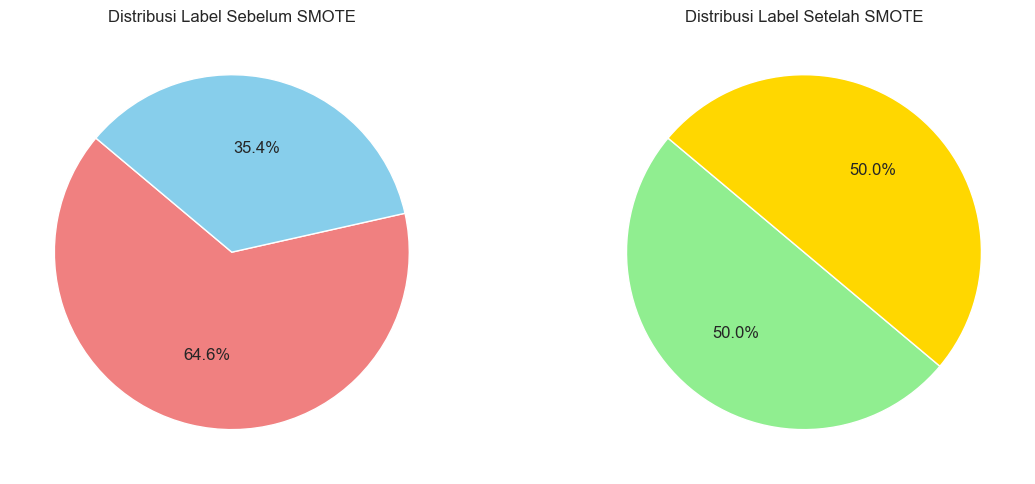

In [154]:
# Visualisasi sebaran kelas sebelum dan sesudah SMOTE
# === Visualisasi Sebaran Kelas Target ===
plt.figure(figsize=(12, 5))

# Pie Chart Sebelum SMOTE (tanpa label)
plt.subplot(1, 2, 1)
counts_before = y_train.value_counts().sort_index()
plt.pie(counts_before, labels=None, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title('Distribusi Label Sebelum SMOTE')

# Pie Chart Setelah SMOTE (tanpa label)
plt.subplot(1, 2, 2)
counts_after = y_train_smote.value_counts().sort_index()
plt.pie(counts_after, labels=None, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'gold'])
plt.title('Distribusi Label Setelah SMOTE')

plt.tight_layout()
plt.show()

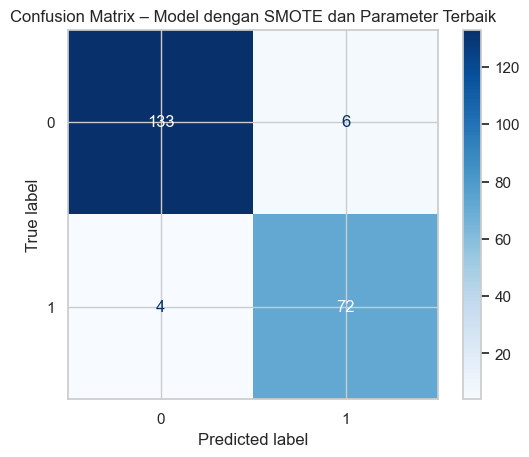


=== Nilai Confusion Matrix ===
True Positive (TP) : 72
True Negative (TN) : 133
False Positive (FP): 6
False Negative (FN): 4


In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ambil parameter terbaik
best_split = best_dengan['Split Ratio']
best_state = int(best_dengan['Random State'])  # pastikan integer
best_n_est = int(best_dengan['n_estimators'])
best_depth = int(best_dengan['max_depth'])

# Split ulang data menggunakan parameter terbaik
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=best_split, random_state=best_state, stratify=y
)

# Terapkan SMOTE
smote = SMOTE(random_state=best_state)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Latih ulang model terbaik
model_terbaik = RandomForestClassifier(
    n_estimators=best_n_est,
    max_depth=best_depth,
    random_state=best_state
)
model_terbaik.fit(X_train_smote, y_train_smote)

# Prediksi ulang
y_pred = model_terbaik.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_terbaik.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Model dengan SMOTE dan Parameter Terbaik")
plt.show()

# Opsional: tampilkan nilai TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print("\n=== Nilai Confusion Matrix ===")
print(f"True Positive (TP) : {tp}")
print(f"True Negative (TN) : {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")


In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

# === 2. SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Pastikan X_train_smote adalah DataFrame
X_train_smote = pd.DataFrame(X_train_smote, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# === 3. Scaling (pakai StandardScaler dengan kolom tetap)
scaler = StandardScaler()
X_train_scaled = X_train_smote.copy()
X_test_scaled = X_test.copy()

numerik_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
    'FunctionalAssessment', 'ADL'
]

X_train_scaled[numerik_cols] = scaler.fit_transform(X_train_scaled[numerik_cols])
X_test_scaled[numerik_cols] = scaler.transform(X_test_scaled[numerik_cols])

# === 4. Train Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
model.fit(X_train_scaled, y_train_smote)

# === 5. Evaluasi Model
y_pred = model.predict(X_test_scaled)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 6. Simpan Model dan Scaler
joblib.dump(model, "model_random_forest_alzheimer.pkl")
joblib.dump(scaler, "scaler.pkl")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       139
           1       0.92      0.95      0.94        76

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



['scaler.pkl']